# San Francisco (SFO) Pulic Department Salary Data Analysis

## 1. Business Understanding
This analysis tries to answer 4 questions about the San Francisco (SFO) public department salary 2011-2014 dataset:

1. How much total salary cost has increased from year 2011 to 2014?
2. Who was the top-earning employee across all the years?
3. Which job title earned the most across all the years?
4. What are the top jobs in terms of job number across all the years?

## 2. Data Understanding

In [2]:
# Import required library and data .csv file

import pandas as pd

df = pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# Print dataset shape

print(df.shape)

(148648, 13)


In [49]:
# Description of dataset

df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148648.000000,148043.000000,148648.000000,148648.000000,112490.000000,148648.000000,148648.000000,148648.000000,0.0
mean,74326.110220,66325.398119,5065.821161,3648.761721,25007.777439,74770.035453,93694.776345,2012.522617,NaN
std,42911.633315,42764.898947,11454.266982,8056.655841,15402.235424,50516.440633,62792.743250,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.750000,33587.350000,0.000000,0.000000,11535.192500,36169.370000,44072.062500,2012.000000,NaN
50%,74326.500000,65007.450000,0.000000,811.205000,28628.365000,71427.130000,92406.020000,2013.000000,NaN
75%,111488.250000,94691.050000,4657.597500,4236.035000,35566.790000,105840.920000,132876.997500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [50]:
# Info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
Id                  148648 non-null int64
EmployeeName        148648 non-null object
JobTitle            148648 non-null object
BasePay             148043 non-null float64
OvertimePay         148648 non-null float64
OtherPay            148648 non-null float64
Benefits            112490 non-null float64
TotalPay            148648 non-null float64
TotalPayBenefits    148648 non-null float64
Year                148648 non-null int64
Notes               0 non-null float64
Agency              148648 non-null object
Status              38119 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


## 3. Data Preparation
Since there is no missing TotalPayBenefits value in the dataset, there is no need to do any data cleaning.

## 4. Modelling (Optional)
There is no modelling involved in this analysis.

## 5.Evaluation

In [51]:
#1. How much total salary cost has increased from year 2011 to 2014?

df.groupby(by=["Year"]).sum()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes
Year,,,,,,,,
2011,653740922,2.299508e+09,1.638191e+08,1.307857e+08,0.000000e+00,2.594113e+09,2.594113e+09,0.0
2012,2005265403,2.405753e+09,1.846650e+08,1.343185e+08,9.720538e+08,2.724736e+09,3.696790e+09,0.0
2013,3449541971,2.576381e+09,1.986214e+08,1.436538e+08,8.961163e+08,2.918656e+09,3.814772e+09,0.0
2014,4939879336,2.537369e+09,2.059186e+08,1.336232e+08,9.449548e+08,2.876911e+09,3.821866e+09,0.0


1227753000.0
47.32843172213392


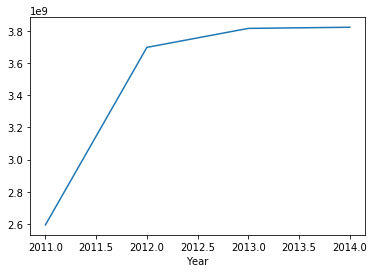

In [52]:
# The TotalPayBenefits difference between 2011 and 2014
%matplotlib inline

print((3.821866e+09-2.594113e+09)) # The TotalPayBenefits increased by 1,227,753,000.0 dollars from 2011 to 2014
print((3.821866e+09-2.594113e+09)/2.594113e+09*100) # The TotalPayBenefits increased 47.3% from 2011 to 2014

df.groupby(by=["Year"]).sum()['TotalPayBenefits'].plot()

In [53]:
#2. Who was the top-earning employee across all the years?

top_earner_index = df.groupby(by=['Year'])['TotalPayBenefits'].idxmax()

In [61]:
# Print out those top earners for each year

import numpy as np

count = 0
years = np.sort(df.Year.unique())
for i in top_earner_index:
    year = years[count]
    employeeName = df.iloc[i]['EmployeeName']
    jobTitle = df.iloc[i]['JobTitle']
    totalPayBenefits = df.iloc[i]['TotalPayBenefits']
    print("The top earner for %d is %s, %s, with the total pay and benefits of $%.2f USD." % (year, employeeName, jobTitle, totalPayBenefits))
    count +=1

The top earner for 2011 is NATHANIEL FORD, GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, with the total pay and benefits of $567595.43 USD.
The top earner for 2012 is Gary Altenberg, Lieutenant, Fire Suppression, with the total pay and benefits of $407274.78 USD.
The top earner for 2013 is Gregory P Suhr, Chief of Police, with the total pay and benefits of $425815.28 USD.
The top earner for 2014 is David Shinn, Deputy Chief 3, with the total pay and benefits of $510732.68 USD.


In [81]:
#3. Which job title earned the most across all the years?
# Calculate the mean TotalPayBenefits for each of the job titles and print the top-10 earning job titles.

# Make job title lowercase
df.JobTitle = df.JobTitle.str.lower()

# Construct a new dataframe to simplify
df_jobtitle_pay = df[['JobTitle', 'TotalPayBenefits']]

# Create a pivot table by calculating the mean TotalPayBenefits for each of the job titles
pivoted_data = df_jobtitle_pay.pivot_table('TotalPayBenefits', index='JobTitle' , aggfunc=np.mean)

# Sort the pivot table data
sorted_salaries = pivoted_data.sort_values(by='TotalPayBenefits', ascending= False)

# Print the top-10 earning job titles
print(sorted_salaries[:10])

# Chief investment officer, chief of fire department and general manager of metropolitan transit authority have
# the top average earning across all the years.

                                                TotalPayBenefits
JobTitle                                                        
chief investment officer                           436224.360000
chief, fire department                             408865.326667
general manager-metropolitan transit authority     399211.275000
gen mgr, public trnsp dept                         380696.440000
chief of police                                    375797.347500
dep dir for investments, ret                       355731.260000
adm, sfgh medical center                           347079.706667
controller                                         343061.140000
asst chf of dept (fire dept)                       342597.550556
dept head v                                        340643.507222


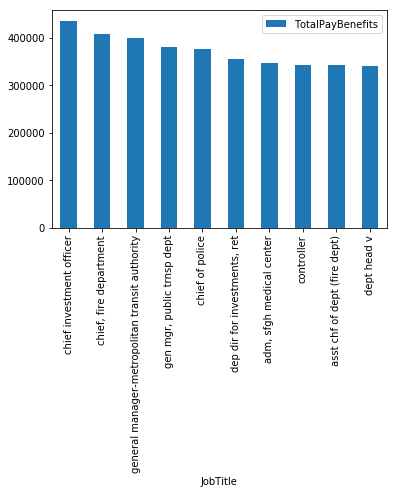

In [82]:
# Visualize the sorted salaries by job title

sorted_salaries[0:10].plot.bar()

transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64


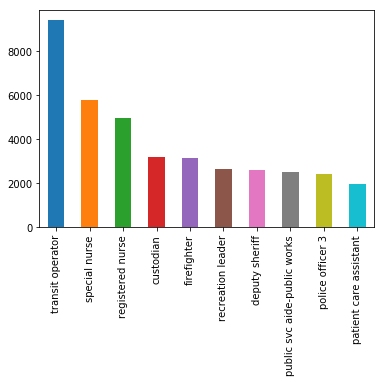

In [84]:
# Find the top number job titles across all the years and visualize

print(df.JobTitle.value_counts()[0:10])
df.JobTitle.value_counts()[0:10].plot.bar()

## 6. Deployment
### Conclusion
#### 1. The total pay and benefits of SFO public department increased by 1,227,753,000.0 (47.3%) dollars from 2011 to 2014.

#### 2. Top earners during 2011–2014 are: 

The top earner for 2011 is NATHANIEL FORD, GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, with the total pay and benefits of 567595.43 USD dollars.  

The top earner for 2012 is Gary Altenberg, Lieutenant, Fire Suppression, with the total pay and benefits of 407274.78 USD dollars.

The top earner for 2013 is Gregory P Suhr, Chief of Police, with the total pay and benefits of 425815.28 USD dollars. 

The top earner for 2014 is David Shinn, Deputy Chief 3, with the total pay and benefits of 510732.68 USD dollars.

#### 3. Among all the top 10 earning jobs, the top 3 earning job positions are chief investment officer, chief of fire department, and general manager of metropolitan transit authority, across 2011-2014.

#### 4. Transit operator, special & registered nurse, custodian and firefighter are the top 4 job with most job numbers in SFO during 2011–2014, followed by recreation leader, deputy sheriff, public service aide-public workers, police officer, and patient care assistant.